In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
#Modules for ML(Recommendation)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [8]:
df = pd.read_csv('../content/drive/MyDrive/ML/top100_kdrama.csv')
df.shape

(100, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [10]:
synopsis = pd.read_csv('../content/drive/MyDrive/ML/top100_kdrama.csv',usecols=['Synopsis'])
synopsis.head()

,Synopsis
0,Geu Roo is a young autistic man. He works for ...
1,The stories of people going through their days...
2,Although Baek Hee Sung is hiding a dark secret...
3,Park Dong Hoon is a middle-aged engineer who i...
4,"Kim Je Hyuk, a famous baseball player, is arre..."


In [11]:
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#5,9.1


In [12]:
#Name as separate DataFrame
kdrama_names = df[['Name']]
kdrama_names.head()

,Name
0,Move to Heaven
1,Hospital Playlist
2,Flower of Evil
3,My Mister
4,Prison Playbook


In [13]:
#Features using for Recommendation
cols_for_recommend = ['Year of release', 'Number of Episode',
                      'Network', 'Duration', 'Content Rating', 'Rating']
df = df[cols_for_recommend]
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),9.2
1,2020,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,9.1
2,2020,16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,9.1
3,2018,16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,9.1
4,2017,16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,9.1


In [14]:
networks = []
[networks.append(list(set(network.replace(' ','').split(',')))[0]) for network in df['Network']]
networks[:5]

['Netflix', 'Netflix', 'tvN', 'tvN', 'Netflix']

In [15]:
df['Network'] = networks
df['Network'].unique()

array(['Netflix', 'tvN', 'jTBC', 'KBS2', 'OCN', 'SBS', 'MBC', 'Viki',
       'DaumKakaoTV'], dtype=object)

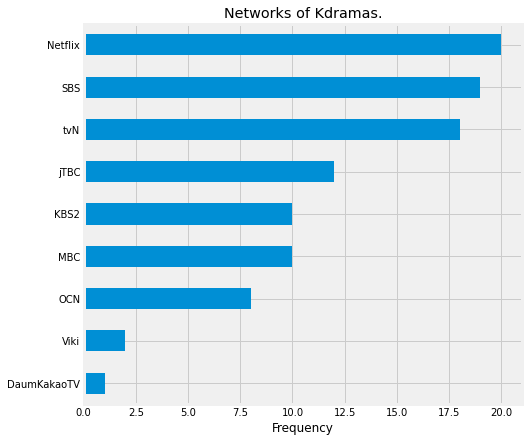

Netflix        20
SBS            19
tvN            18
jTBC           12
KBS2           10
MBC            10
OCN             8
Viki            2
DaumKakaoTV     1
Name: Network, dtype: int64

In [16]:
#Network and Total KDramas
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.show()

df['Network'].value_counts()

In [17]:
#Setting OCN and ViKi networks to others because of less count
df['Network'].replace(['OCN','Viki'],['Others','Others'],inplace=True)

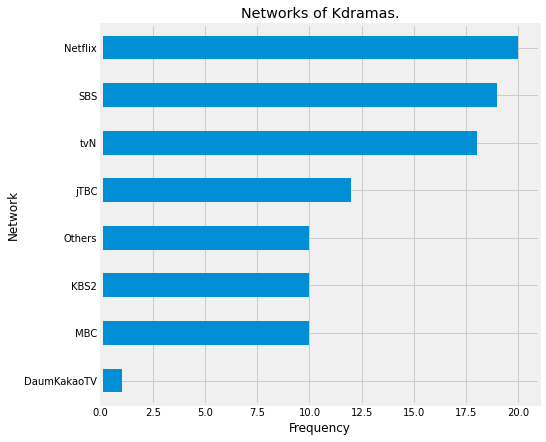

Netflix        20
SBS            19
tvN            18
jTBC           12
Others         10
KBS2           10
MBC            10
DaumKakaoTV     1
Name: Network, dtype: int64

In [18]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.ylabel('Network')
plt.show()

df['Network'].value_counts()

In [19]:
#Duration in Minutes
df['Duration'] = df['Duration'].str.replace('[A-Za-z]\D+','',regex=True)
df['Duration'].head()

0      52 
1    1 30 
2    1 10 
3    1 17 
4    1 32 
Name: Duration, dtype: object

In [20]:
df['Duration'] = df['Duration'].str.replace(' ','',regex=True)
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'].head()

0     52
1    130
2    110
3    117
4    132
Name: Duration, dtype: int64

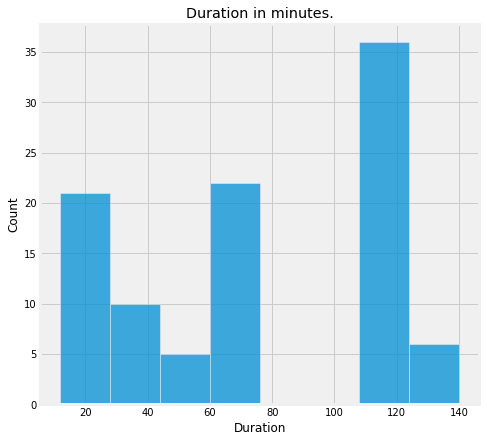

In [21]:
plt.figure(figsize=(7,7))
sns.histplot(data=df['Duration'])
plt.title('Duration in minutes.')
plt.show()

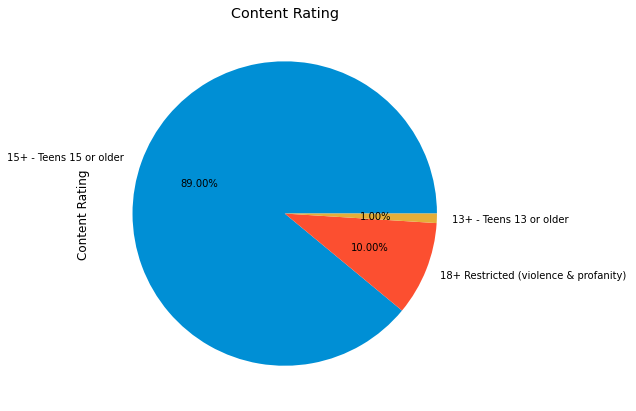

In [22]:
#Content Rating
plt.figure(figsize=(7,7))
df['Content Rating'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Content Rating")
plt.show()

In [23]:
df['Content Rating'].value_counts()

15+ - Teens 15 or older                   89
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    1
Name: Content Rating, dtype: int64

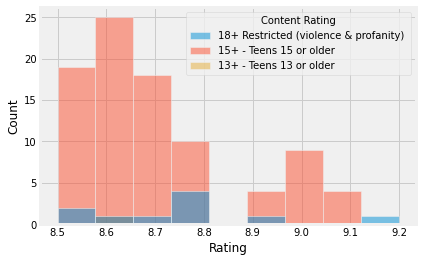

In [24]:
#Rating and Content Rating
sns.histplot(data=df[['Rating','Content Rating']],x='Rating',hue='Content Rating')
plt.show()

In [25]:
df[['Rating']].describe()

,Rating
count,100.000000
mean,8.703000
std,0.178351
min,8.500000
25%,8.600000
50%,8.700000
75%,8.800000
max,9.200000


In [26]:
#One Hot Encoding
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52,18+ Restricted (violence & profanity),9.2
1,2020,12,Netflix,130,15+ - Teens 15 or older,9.1
2,2020,16,tvN,110,15+ - Teens 15 or older,9.1
3,2018,16,tvN,117,15+ - Teens 15 or older,9.1
4,2017,16,Netflix,132,15+ - Teens 15 or older,9.1


In [27]:
cols_to_encode = ['Network','Content Rating']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.head()

,Network_KBS2,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,1,0


In [28]:
df.drop(cols_to_encode, axis=1,inplace=True)
df.head()

,Year of release,Number of Episode,Duration,Rating
0,2021,10,52,9.2
1,2020,12,130,9.1
2,2020,16,110,9.1
3,2018,16,117,9.1
4,2017,16,132,9.1


In [29]:
#Feature Scaling
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [30]:
i=0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [31]:
df.head()

,Year of release,Number of Episode,Duration,Rating
0,1.000000,0.042553,0.312500,1.000000
1,0.944444,0.063830,0.921875,0.857143
2,0.944444,0.106383,0.765625,0.857143
3,0.833333,0.106383,0.820312,0.857143
4,0.777778,0.106383,0.937500,0.857143


In [32]:
new_df = pd.concat([df, dummies],axis=1)
new_df.shape

(100, 13)

In [33]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_KBS2,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,1.000000,0.042553,0.312500,1.000000,0,0,1,0,0,0,0,0,1
1,0.944444,0.063830,0.921875,0.857143,0,0,1,0,0,0,0,1,0
2,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,0,1,1,0
3,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,0,1,1,0
4,0.777778,0.106383,0.937500,0.857143,0,0,1,0,0,0,0,1,0


In [34]:
kdrama_names['Name'].loc[23]='kingdom'

In [35]:
new_df.index = [drama for drama in kdrama_names['Name']]
synopsis.index = [drama for drama in kdrama_names['Name']]

In [36]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_KBS2,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
Move to Heaven,1.000000,0.042553,0.312500,1.000000,0,0,1,0,0,0,0,0,1
Hospital Playlist,0.944444,0.063830,0.921875,0.857143,0,0,1,0,0,0,0,1,0
Flower of Evil,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,0,1,1,0
My Mister,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,0,1,1,0
Prison Playbook,0.777778,0.106383,0.937500,0.857143,0,0,1,0,0,0,0,1,0


In [37]:
def getRecommendation_dramas_for(drama_name,no_of_recommend=5,get_similarity_rate=False):
    
    kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
    kn.fit(new_df)
    
    distances, indices = kn.kneighbors(new_df.loc[drama_name])
    
    print(f'Similar K-Dramas for "{drama_name[0]}":')
    nearest_dramas = [kdrama_names.loc[i][0] for i in indices.flatten()][1:]
    if not get_similarity_rate:
        return nearest_dramas
    sim_rates = []
    synopsis_ = []
    for drama in nearest_dramas:
        synopsis_.append(synopsis.loc[drama][0])
        sim = cosine_similarity(new_df.loc[drama_name],[new_df.loc[drama]]).flatten()
        sim_rates.append(sim[0])
    recommended_dramas = pd.DataFrame({'Recommended Drama':nearest_dramas,'Similarity':sim_rates,'Synopsis':synopsis_})
    recommended_dramas.sort_values(by='Similarity',ascending=True)
    return recommended_dramas

In [38]:
#Predicting Drama Recommendation
rd1 = kdrama_names.loc[0]
rd1

Name    Move to Heaven
Name: 0, dtype: object

In [39]:
getRecommendation_dramas_for(rd1,no_of_recommend=5)

Similar K-Dramas for "Move to Heaven":


['Kingdom', 'Sweet Home', 'kingdom', 'Extracurricular', 'Navillera']

In [40]:
rd2 = kdrama_names.loc[10]
rd2

Name    Mother
Name: 10, dtype: object

In [41]:
getRecommendation_dramas_for(rd2,get_similarity_rate=True)

Similar K-Dramas for "Mother":


,Recommended Drama,Similarity,Synopsis
0,What's Wrong with Secretary Kim,0.916882,The series revolves around the narcissistic Le...
1,Signal,0.908419,"Fifteen years ago, a young girl was kidnapped ..."
2,My Mister,0.914022,Park Dong Hoon is a middle-aged engineer who i...
3,Mr. Queen,0.910188,Jang Bong Hwan is a South Korean chef who has ...
4,Flower of Evil,0.926961,Although Baek Hee Sung is hiding a dark secret...


In [42]:
rd3 = kdrama_names.loc[1]
rd3

Name    Hospital Playlist
Name: 1, dtype: object

In [43]:
getRecommendation_dramas_for(rd3,get_similarity_rate=True)

Similar K-Dramas for "Hospital Playlist":


,Recommended Drama,Similarity,Synopsis
0,Prison Playbook,0.996988,"Kim Je Hyuk, a famous baseball player, is arre..."
1,Crash Landing on You,0.997901,"After getting into a paragliding accident, Sou..."
2,It's Okay to Not Be Okay,0.996995,Moon Gang Tae is a community health worker at ...
3,Vincenzo,0.996514,"At the age of eight, Park Joo Hyeong went to I..."
4,Mr. Sunshine,0.989576,Mr. Sunshine centers on a young boy born into ...


In [44]:
def print_similiar_drama_Synopsis(recommended_df):
    rdf = recommended_df
    rdf_cols = rdf['Synopsis']
    dramas = rdf['Recommended Drama']
    for i in range(5):
        print(dramas[i])
        print(rdf_cols[i])
        print('\n')

In [45]:
rd4 = kdrama_names.loc[8]
rd4

Name    Navillera
Name: 8, dtype: object

In [46]:
rdf4 = getRecommendation_dramas_for(rd4,no_of_recommend=10,get_similarity_rate=True)
print_similiar_drama_Synopsis(rdf4)

Similar K-Dramas for "Navillera":
Stranger 2
The prosecutor's office and the police find themselves on opposing sides. The prosecutors, including elite prosecutor Woo Tae Ha, want discretionary power over investigations. Meanwhile, the police, including Choi Bit, tries to get complete investigative authority that is independent of the prosecutor's office.


It's Okay to Not Be Okay
Moon Gang Tae is a community health worker at a psychiatric ward who was blessed with everything including a great body, smarts, ability to sympathize with others, patience, ability to react quickly, stamina, and more. Meanwhile, Ko Moon Young is a popular writer of children’s literature who, due to suffering from an antisocial personality disorder, seems extremely selfish, arrogant, and rude.


Vincenzo
At the age of eight, Park Joo Hyeong went to Italy after being adopted. Now an adult, he is known as Vincenzo Cassano to the Mafia, who employ him as a consigliere. Because mafia factions are at war with eac

In [48]:
rd5 = kdrama_names.loc[10]
rd5

Name    Mother
Name: 10, dtype: object

In [49]:
getRecommendation_dramas_for(rd5,no_of_recommend=5,get_similarity_rate=True)

Similar K-Dramas for "Mother":


,Recommended Drama,Similarity,Synopsis
0,What's Wrong with Secretary Kim,0.916882,The series revolves around the narcissistic Le...
1,Signal,0.908419,"Fifteen years ago, a young girl was kidnapped ..."
2,My Mister,0.914022,Park Dong Hoon is a middle-aged engineer who i...
3,Mr. Queen,0.910188,Jang Bong Hwan is a South Korean chef who has ...
4,Flower of Evil,0.926961,Although Baek Hee Sung is hiding a dark secret...
